## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 500
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Analysis

In [3]:
# Shape of the Data
df.shape

(200, 5)

In [4]:
# Check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Check Number of Males and Females
df.select_dtypes(include='object').value_counts()

Gender
Female    112
Male       88
dtype: int64

In [6]:
# Check Duplicate data
df.duplicated().sum()

0

In [7]:
# Data Summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# drop Customer ID 

df.drop(["CustomerID"],axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


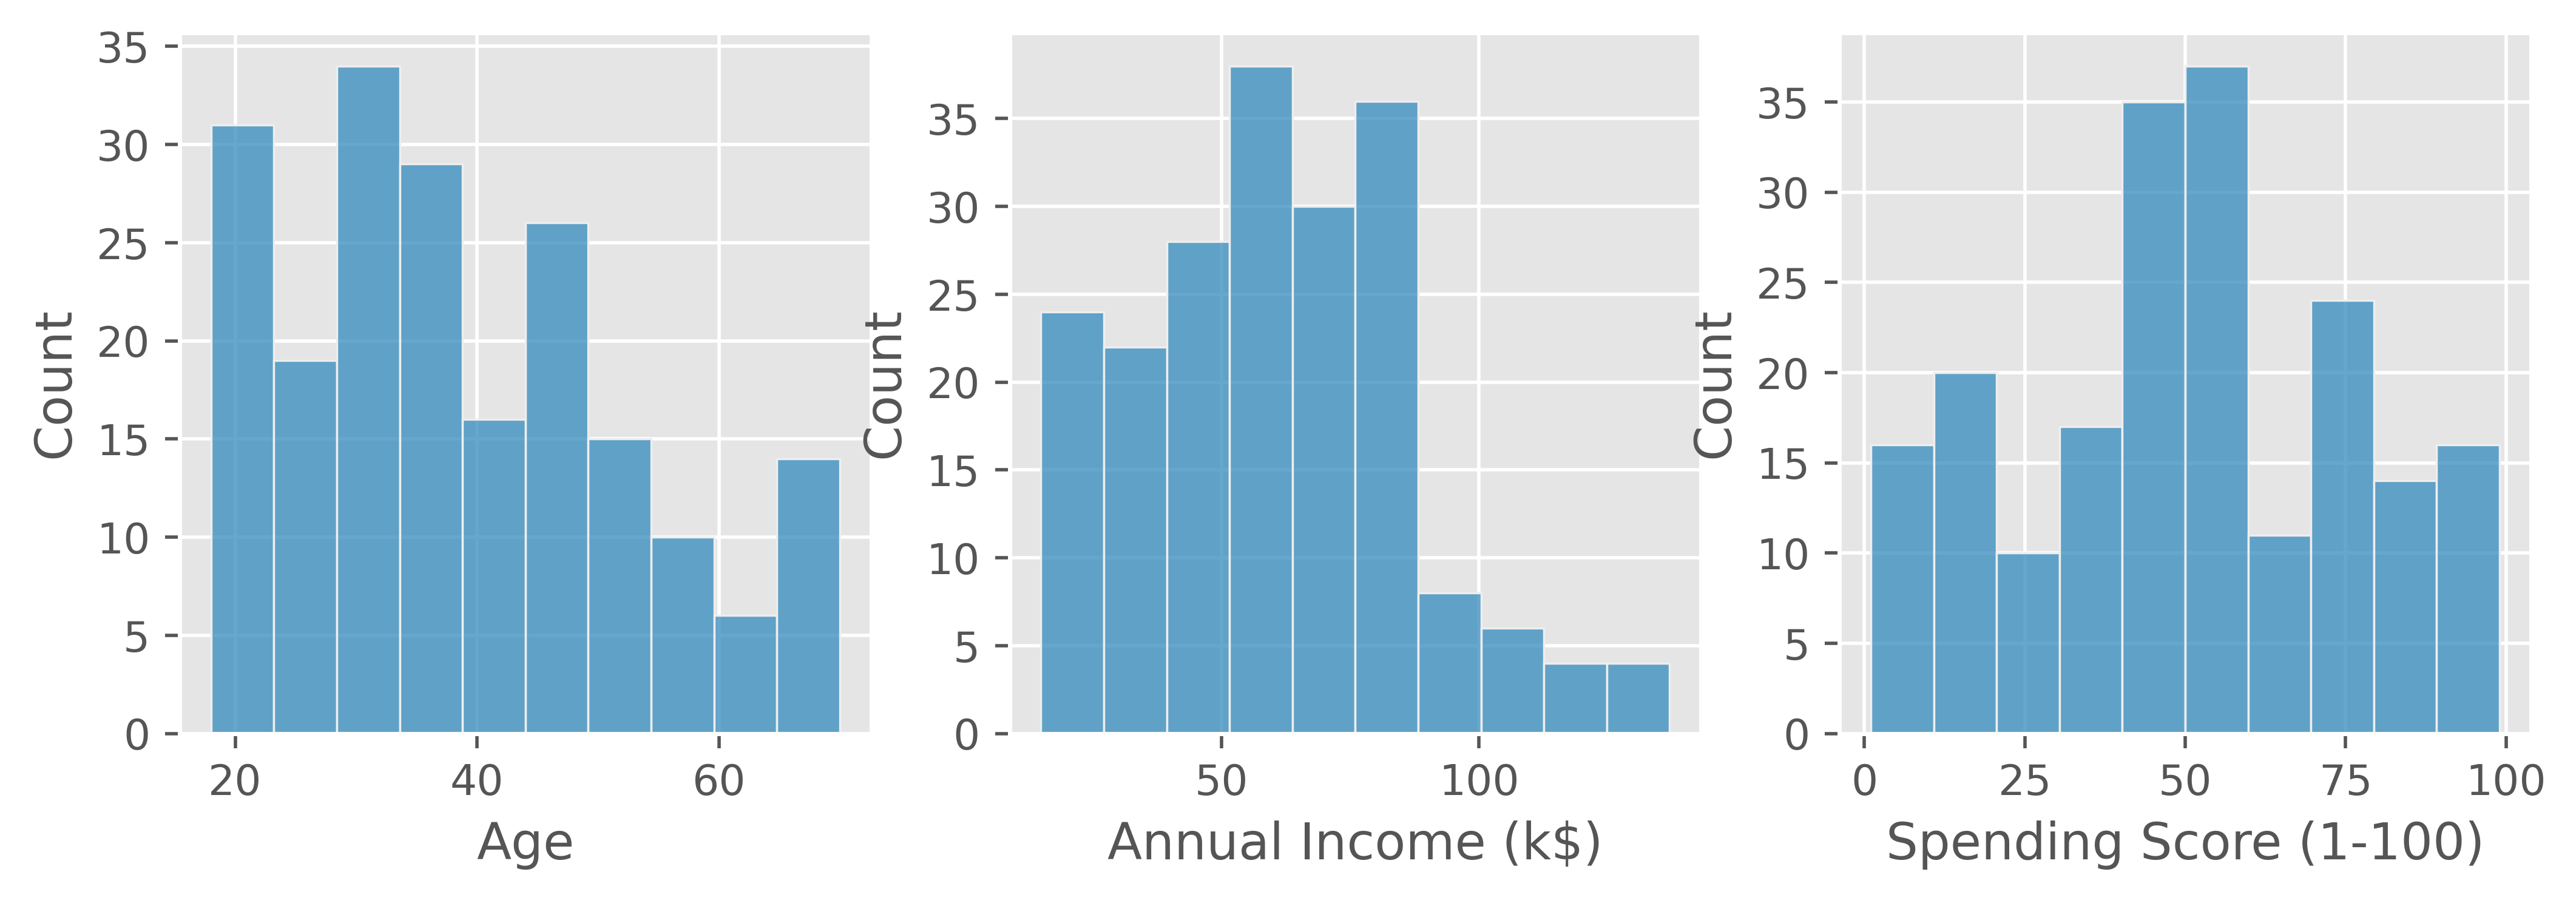

In [9]:
# Distribution of Data

cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10,3))
sns.histplot(data=df[cols[0]],ax=axes[0],bins=10)
sns.histplot(data=df[cols[1]],ax=axes[1],bins=10)
sns.histplot(data=df[cols[2]],ax=axes[2],bins=10)
plt.show()

Mean of Annual Income for Male :  62.23
Mean of Annual Income for Female :  59.25


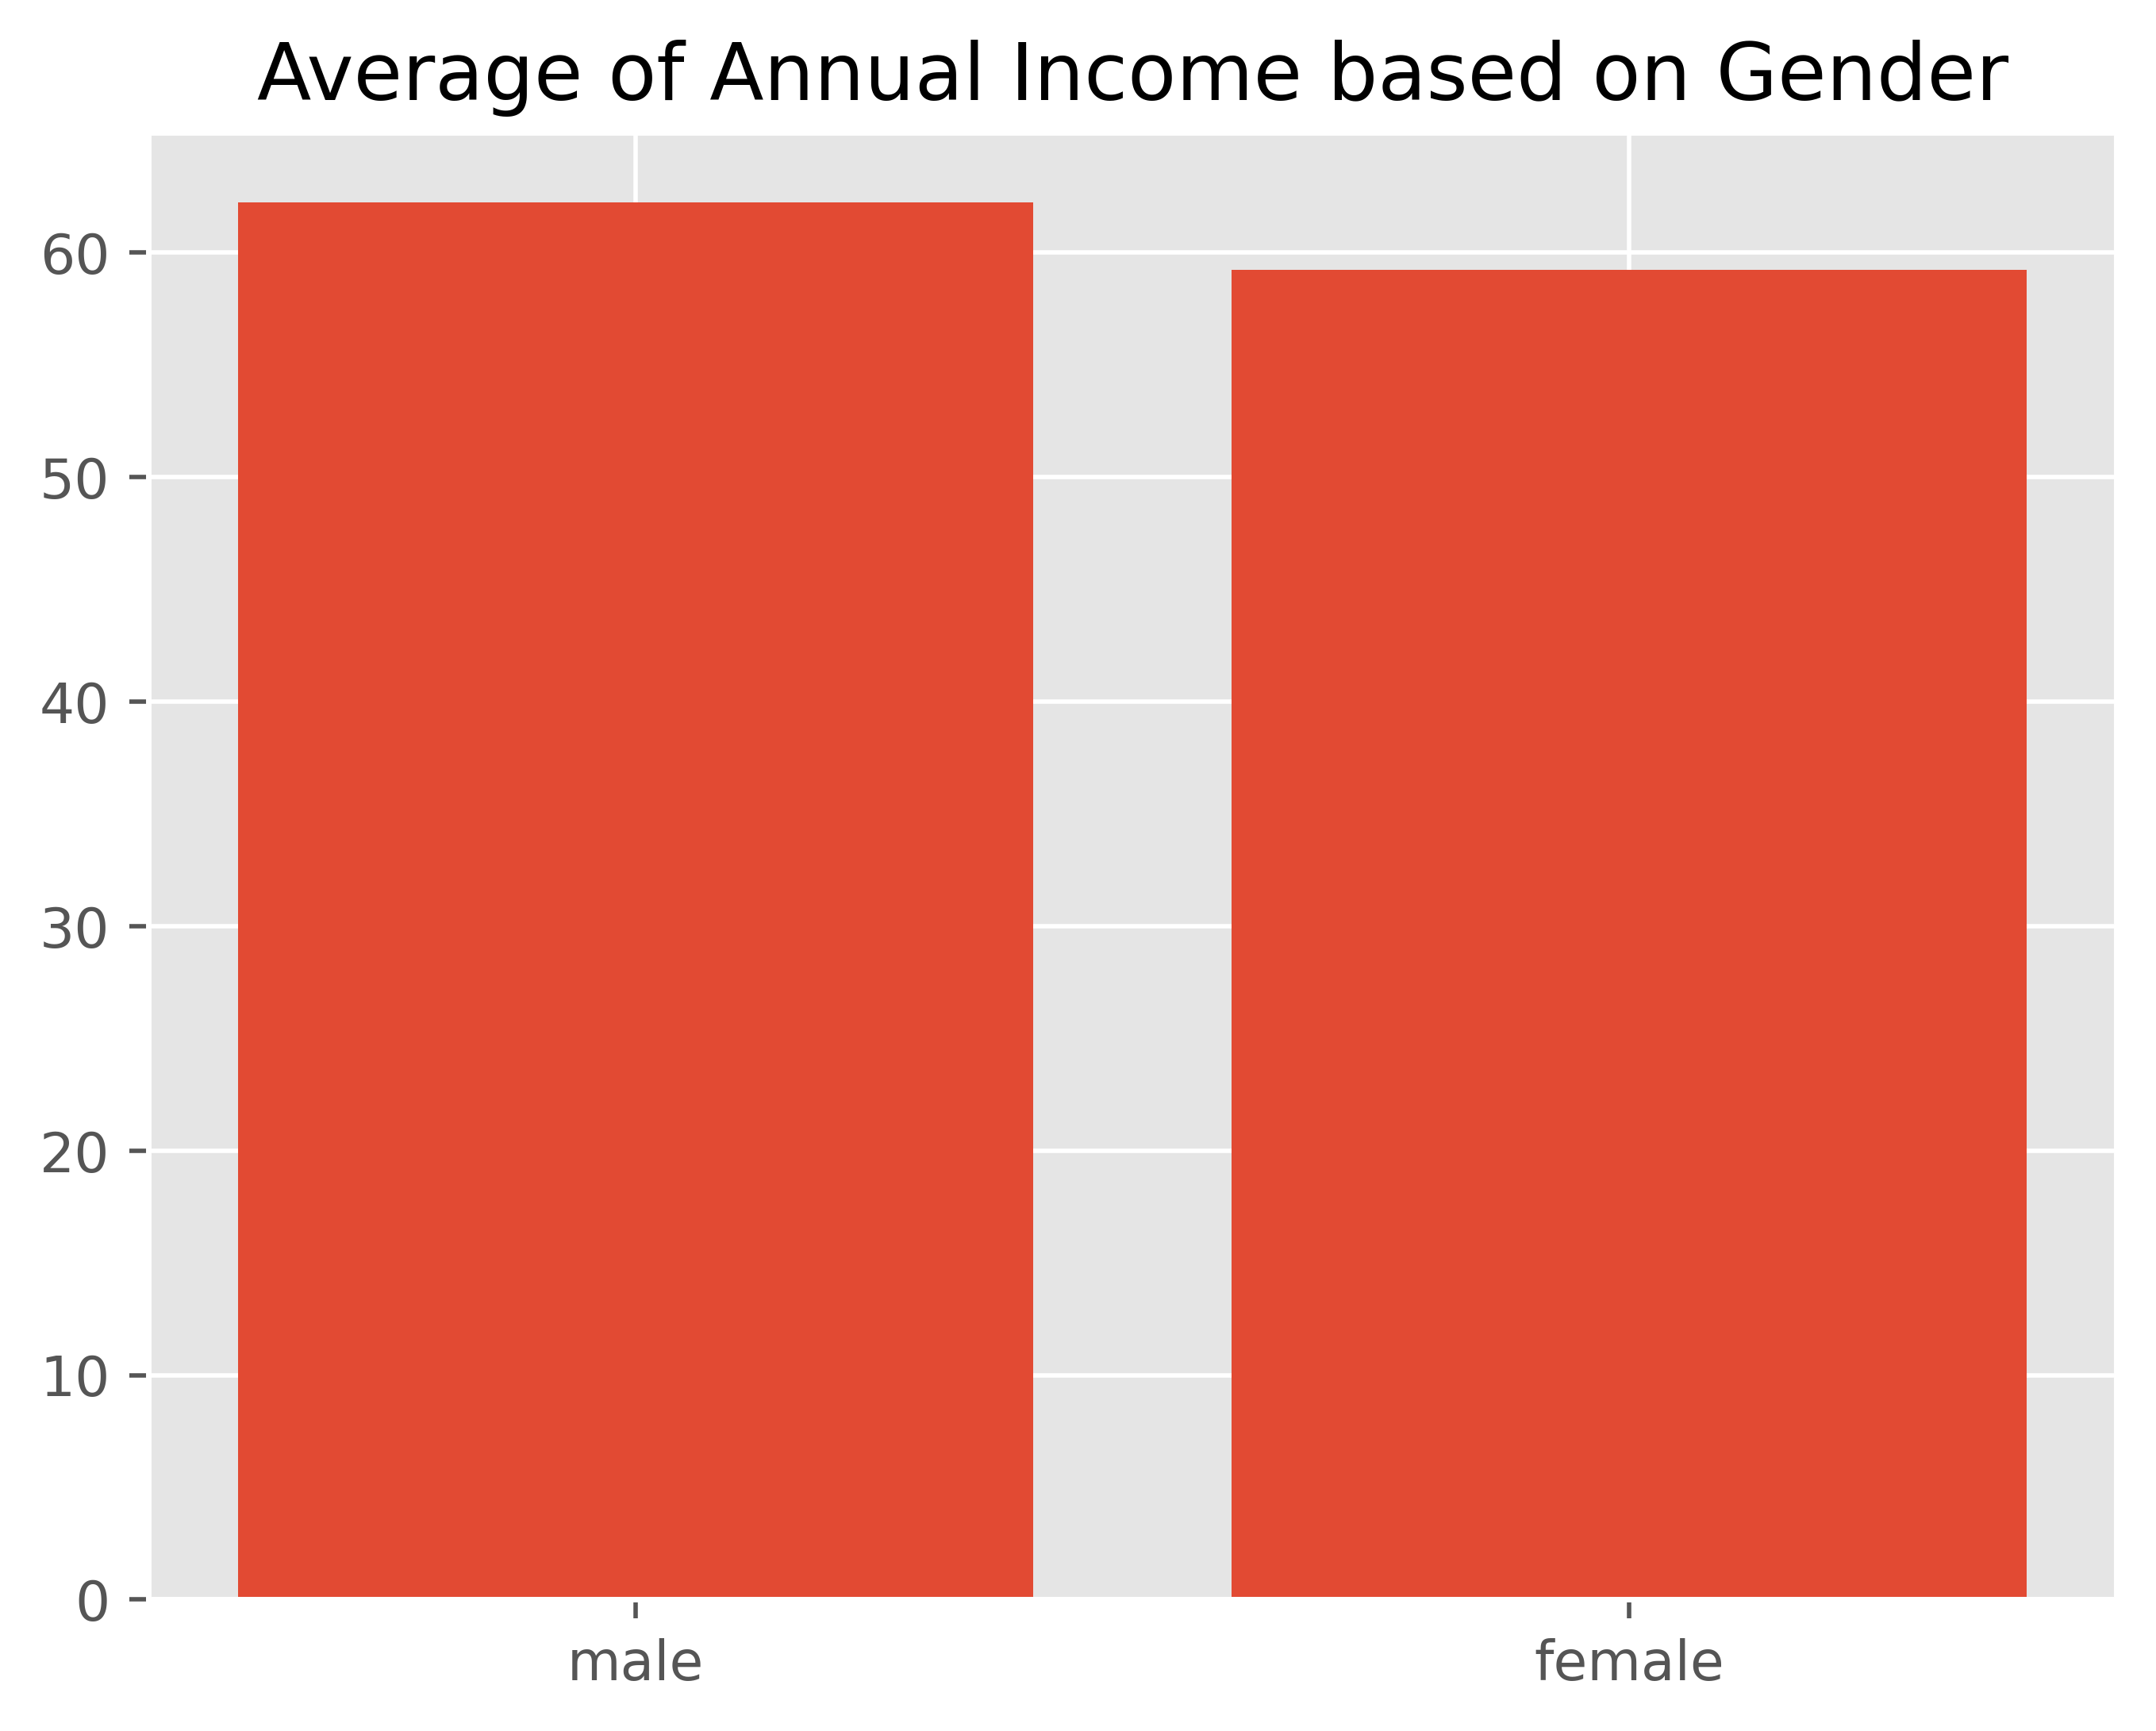

In [10]:
# Average of Annual Income based on Gender

male_mean = round(df[df["Gender"] == 'Male']['Annual Income (k$)'].mean(),2)
female_mean = round(df[df["Gender"] == 'Female']['Annual Income (k$)'].mean(),2)
print("Mean of Annual Income for Male : ",male_mean)
print("Mean of Annual Income for Female : ",female_mean)

plt.title("Average of Annual Income based on Gender")
plt.bar(['male','female'],[male_mean,female_mean],)
plt.show()

Mean of Spending Score for Male :  48.51
Mean of Spending Score for Female :  51.53


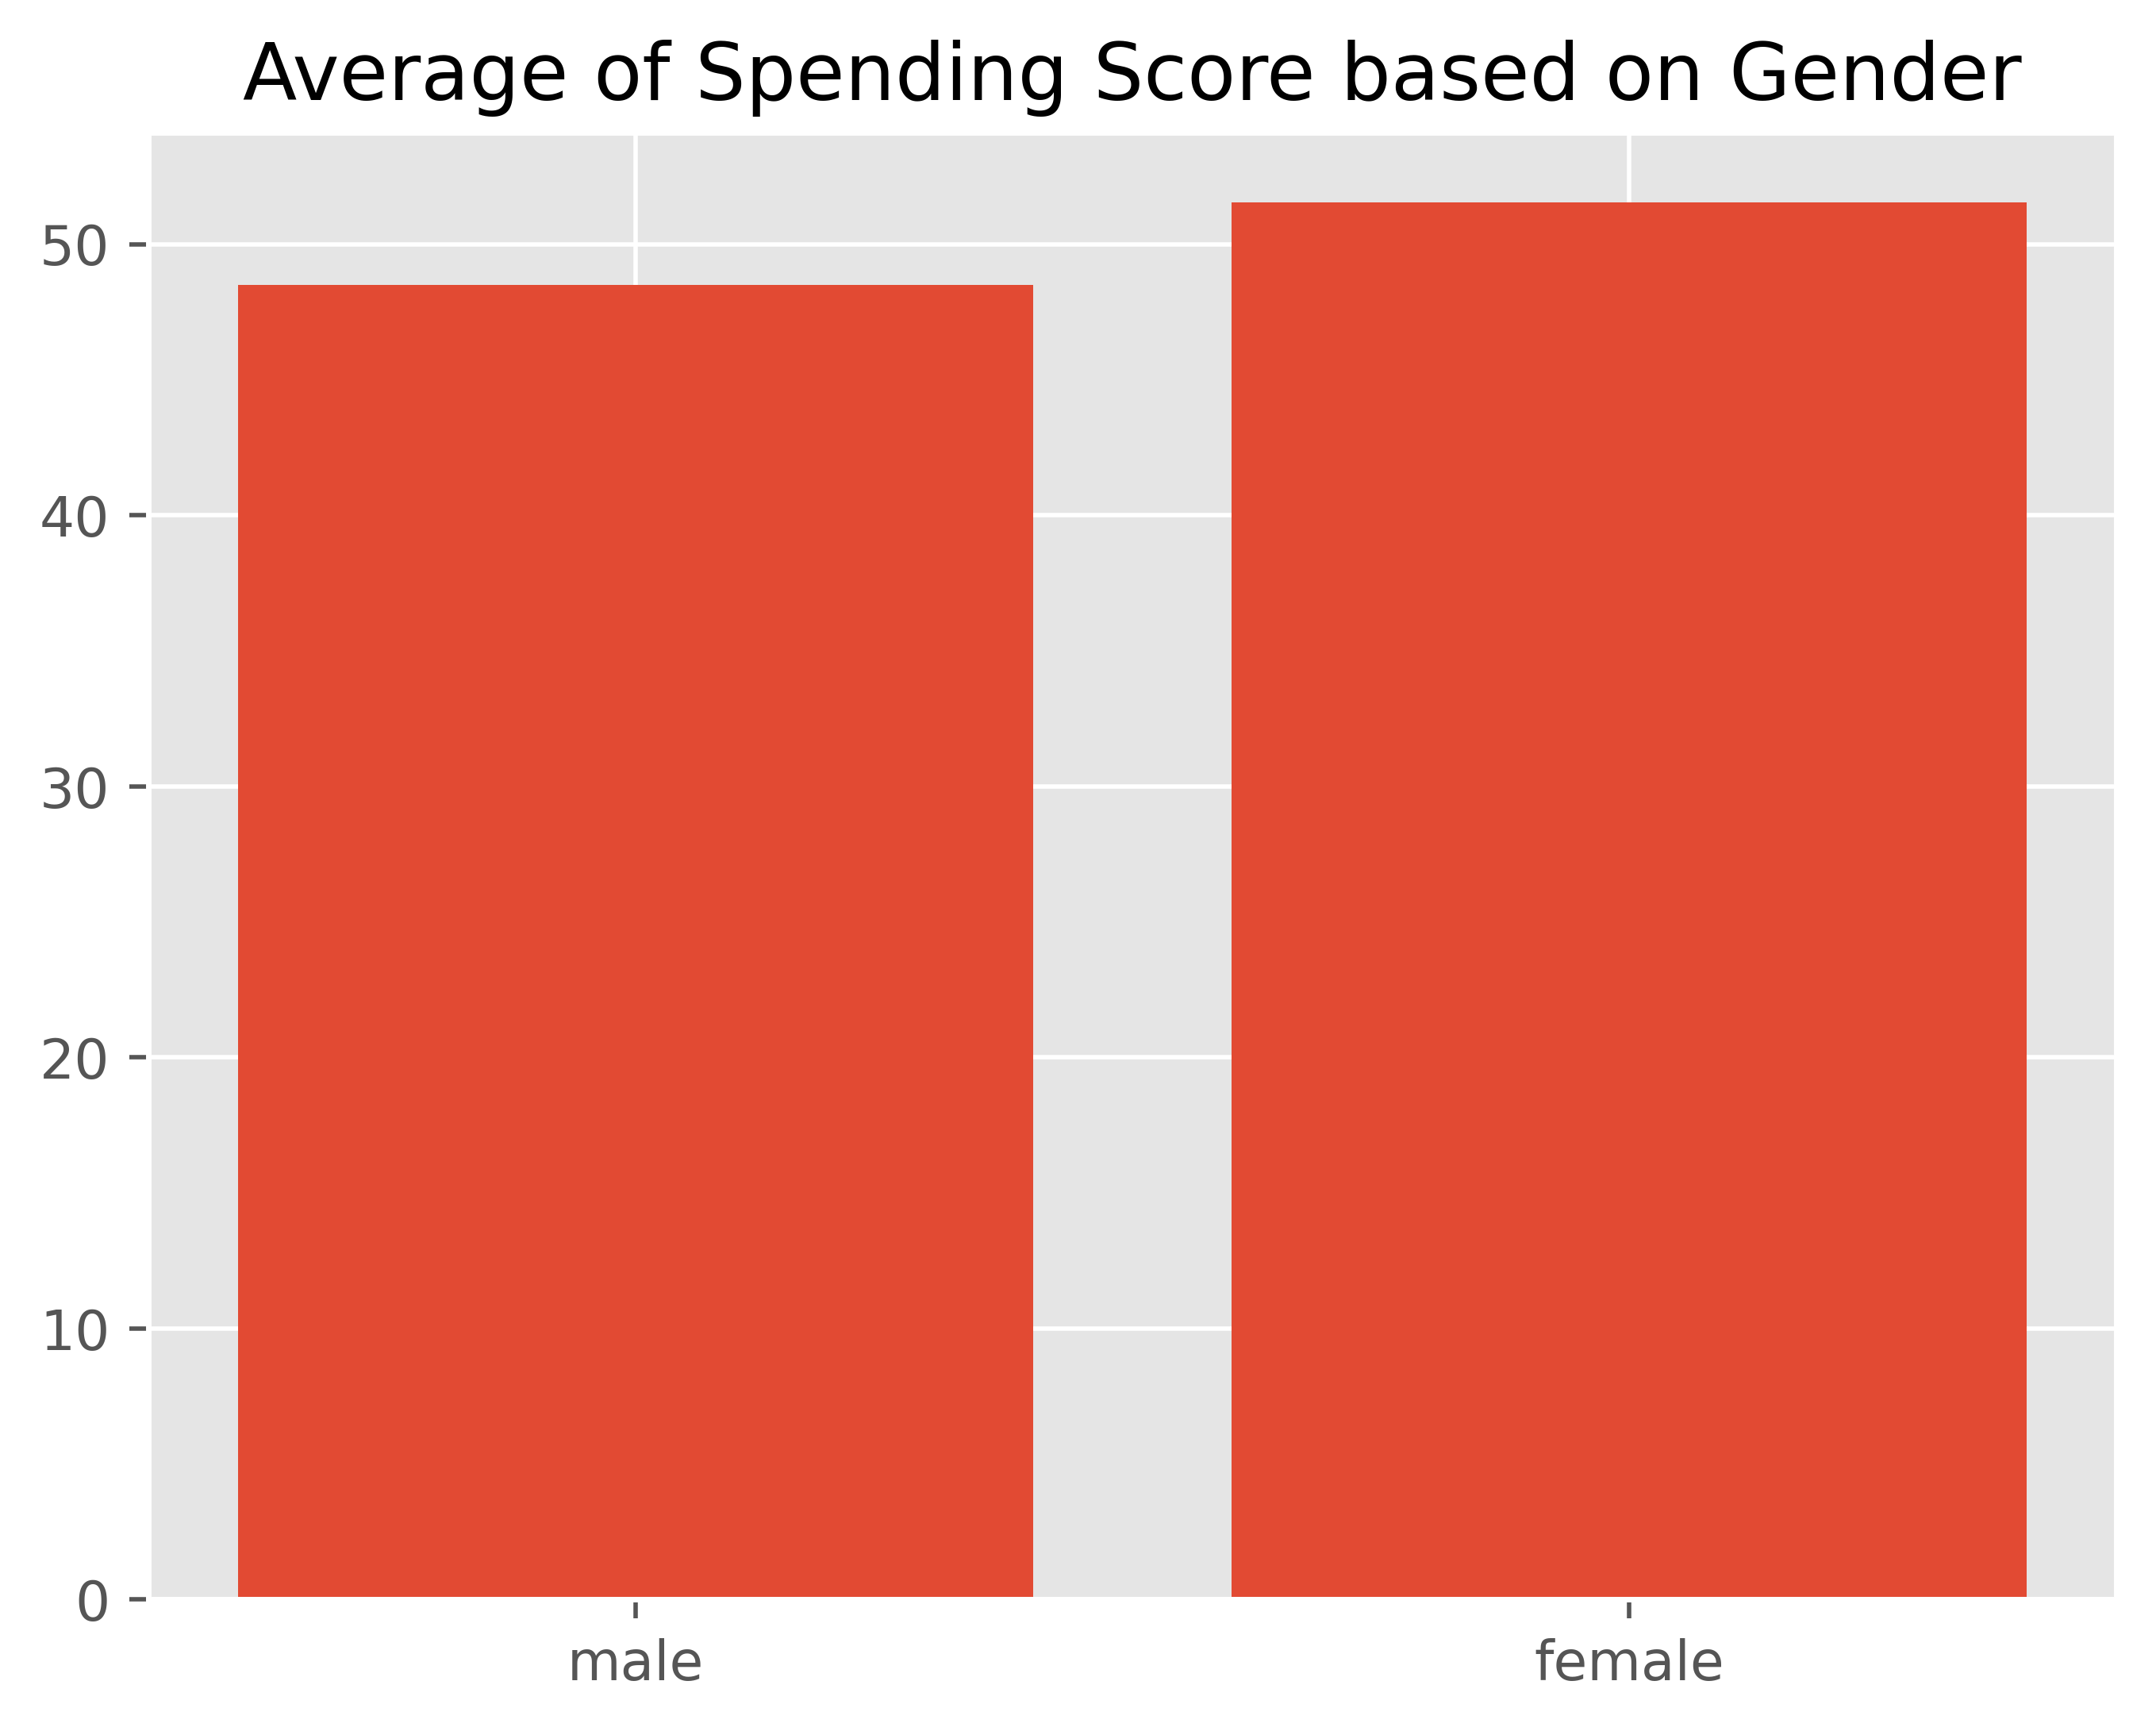

In [11]:
# Average of Spending Score based on Gender

male_score = round(df[df["Gender"] == 'Male']['Spending Score (1-100)'].mean(),2)
female_score = round(df[df["Gender"] == 'Female']['Spending Score (1-100)'].mean(),2)
print("Mean of Spending Score for Male : ",male_score)
print("Mean of Spending Score for Female : ",female_score)

plt.title("Average of Spending Score based on Gender")
plt.bar(['male','female'],[male_score,female_score],)
plt.show()

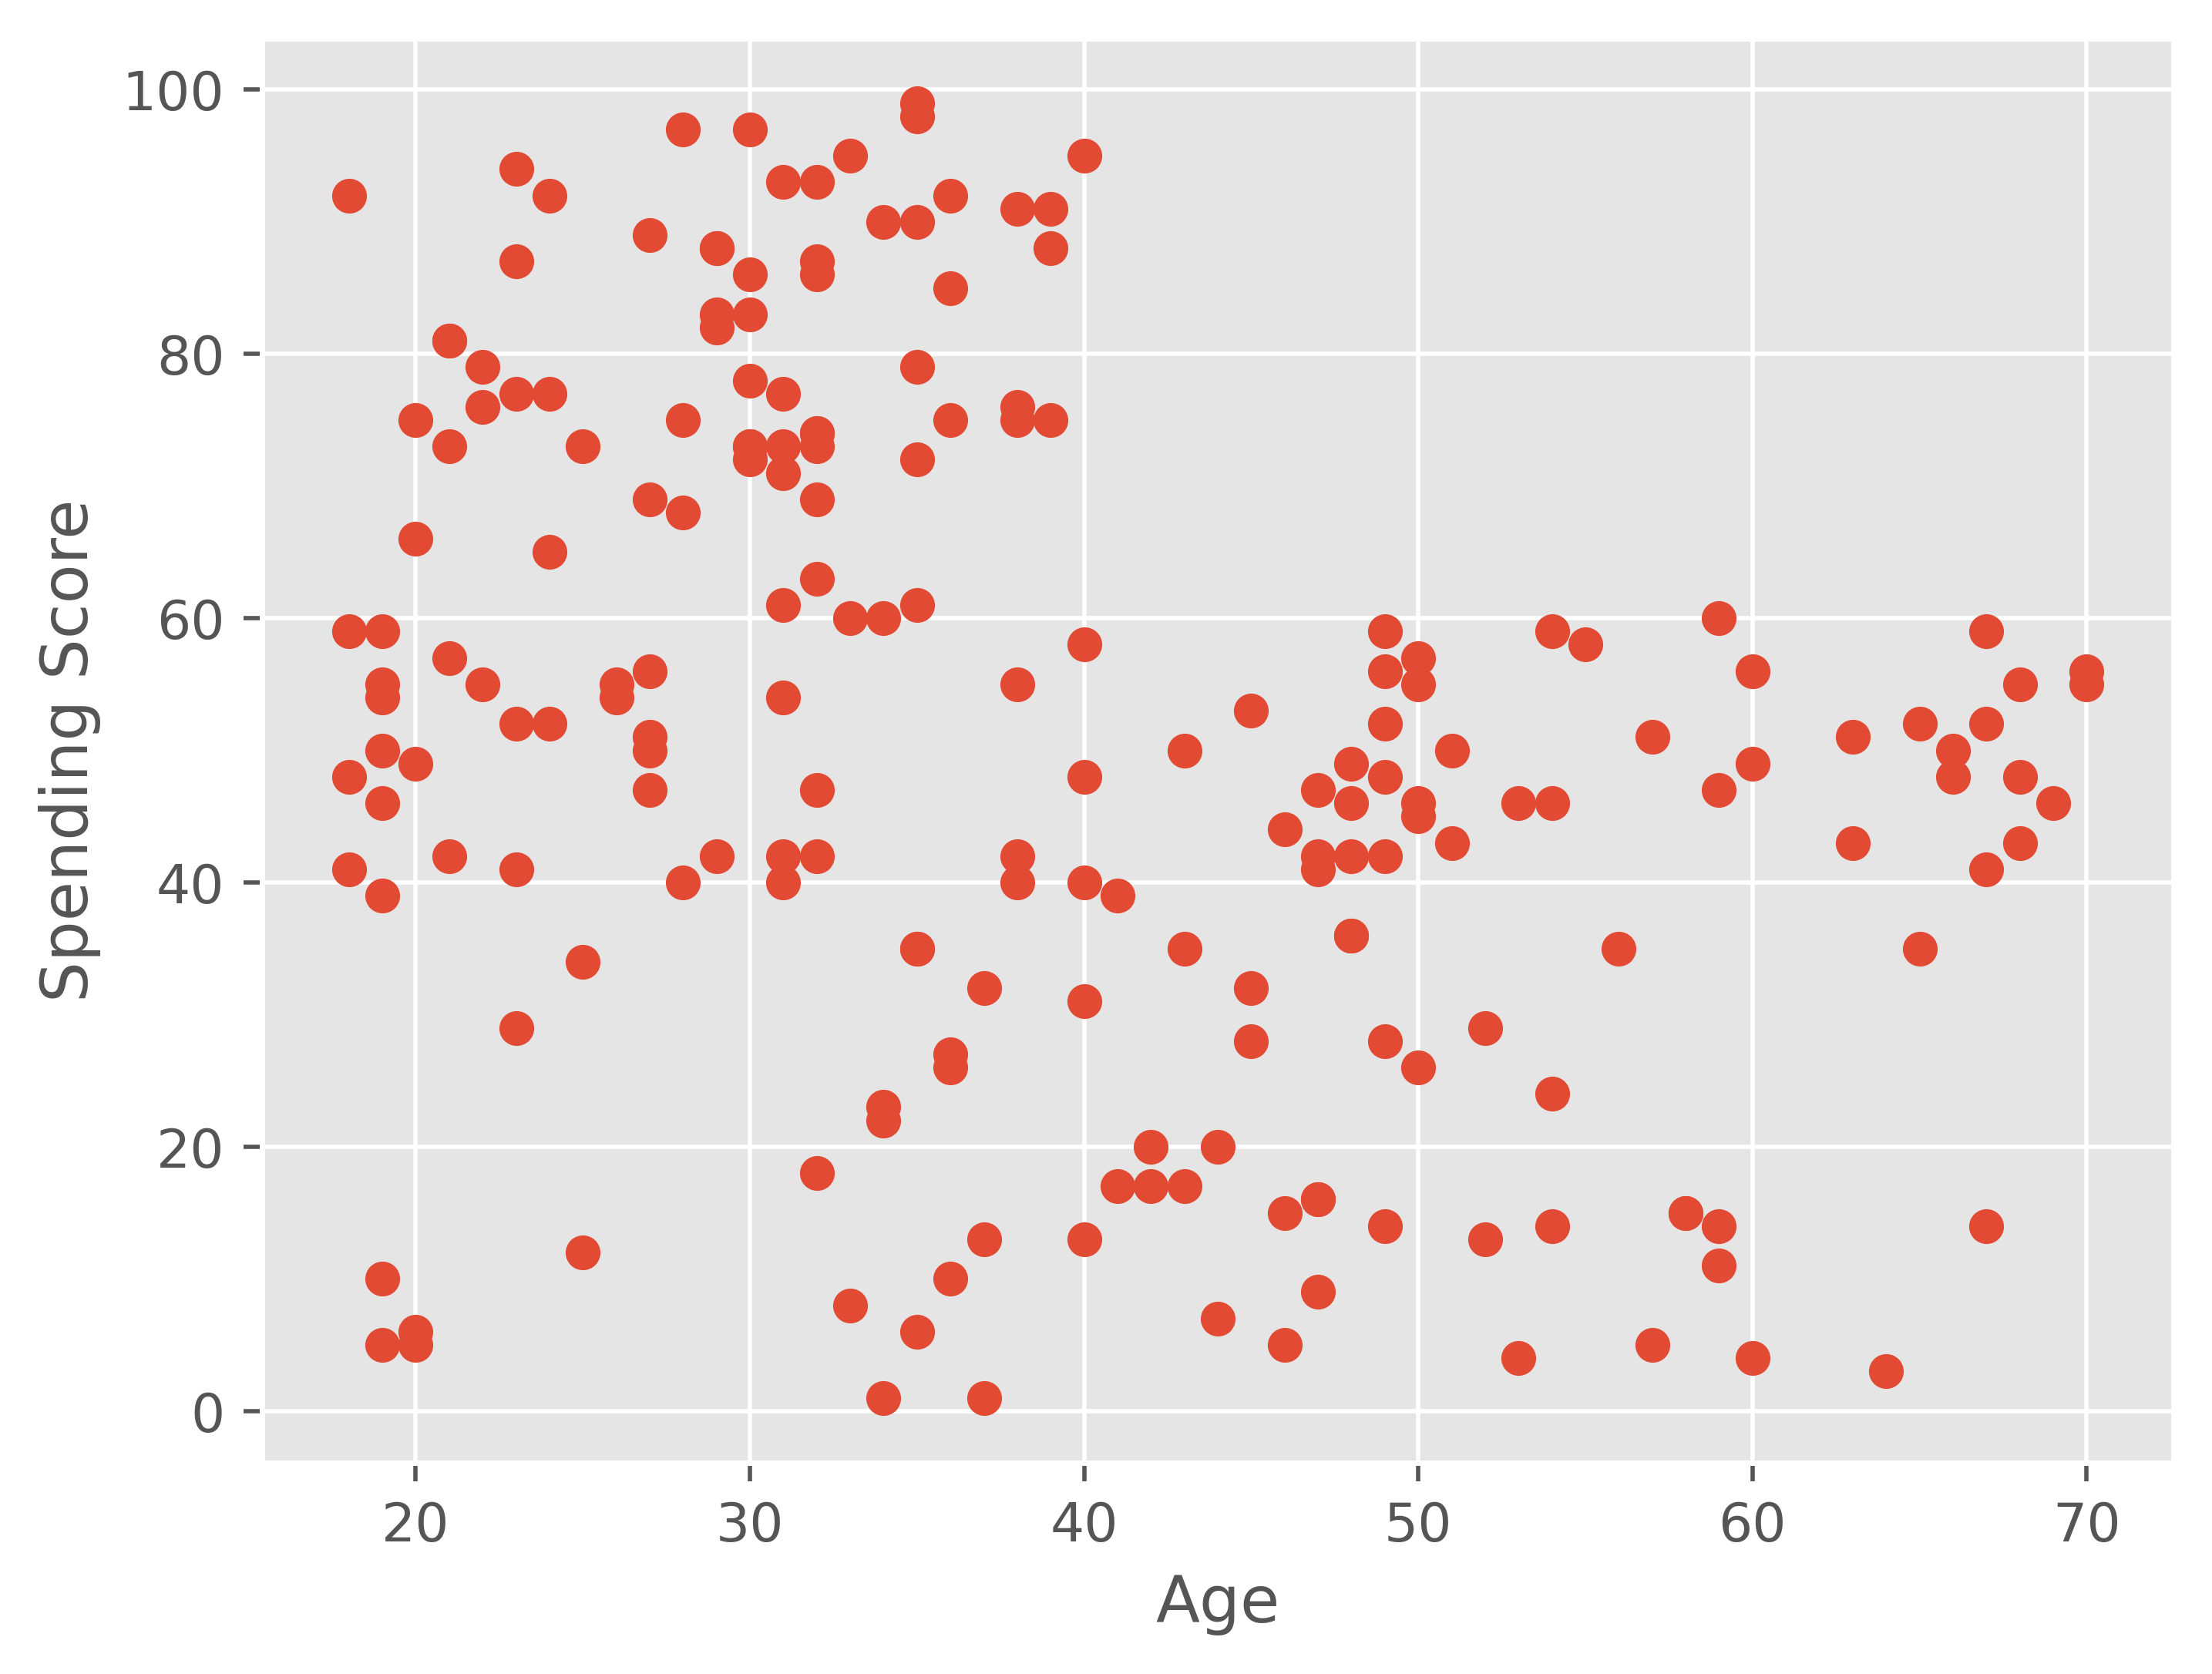

In [12]:
# Age vs Spending Score

plt.scatter(df["Age"],df["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

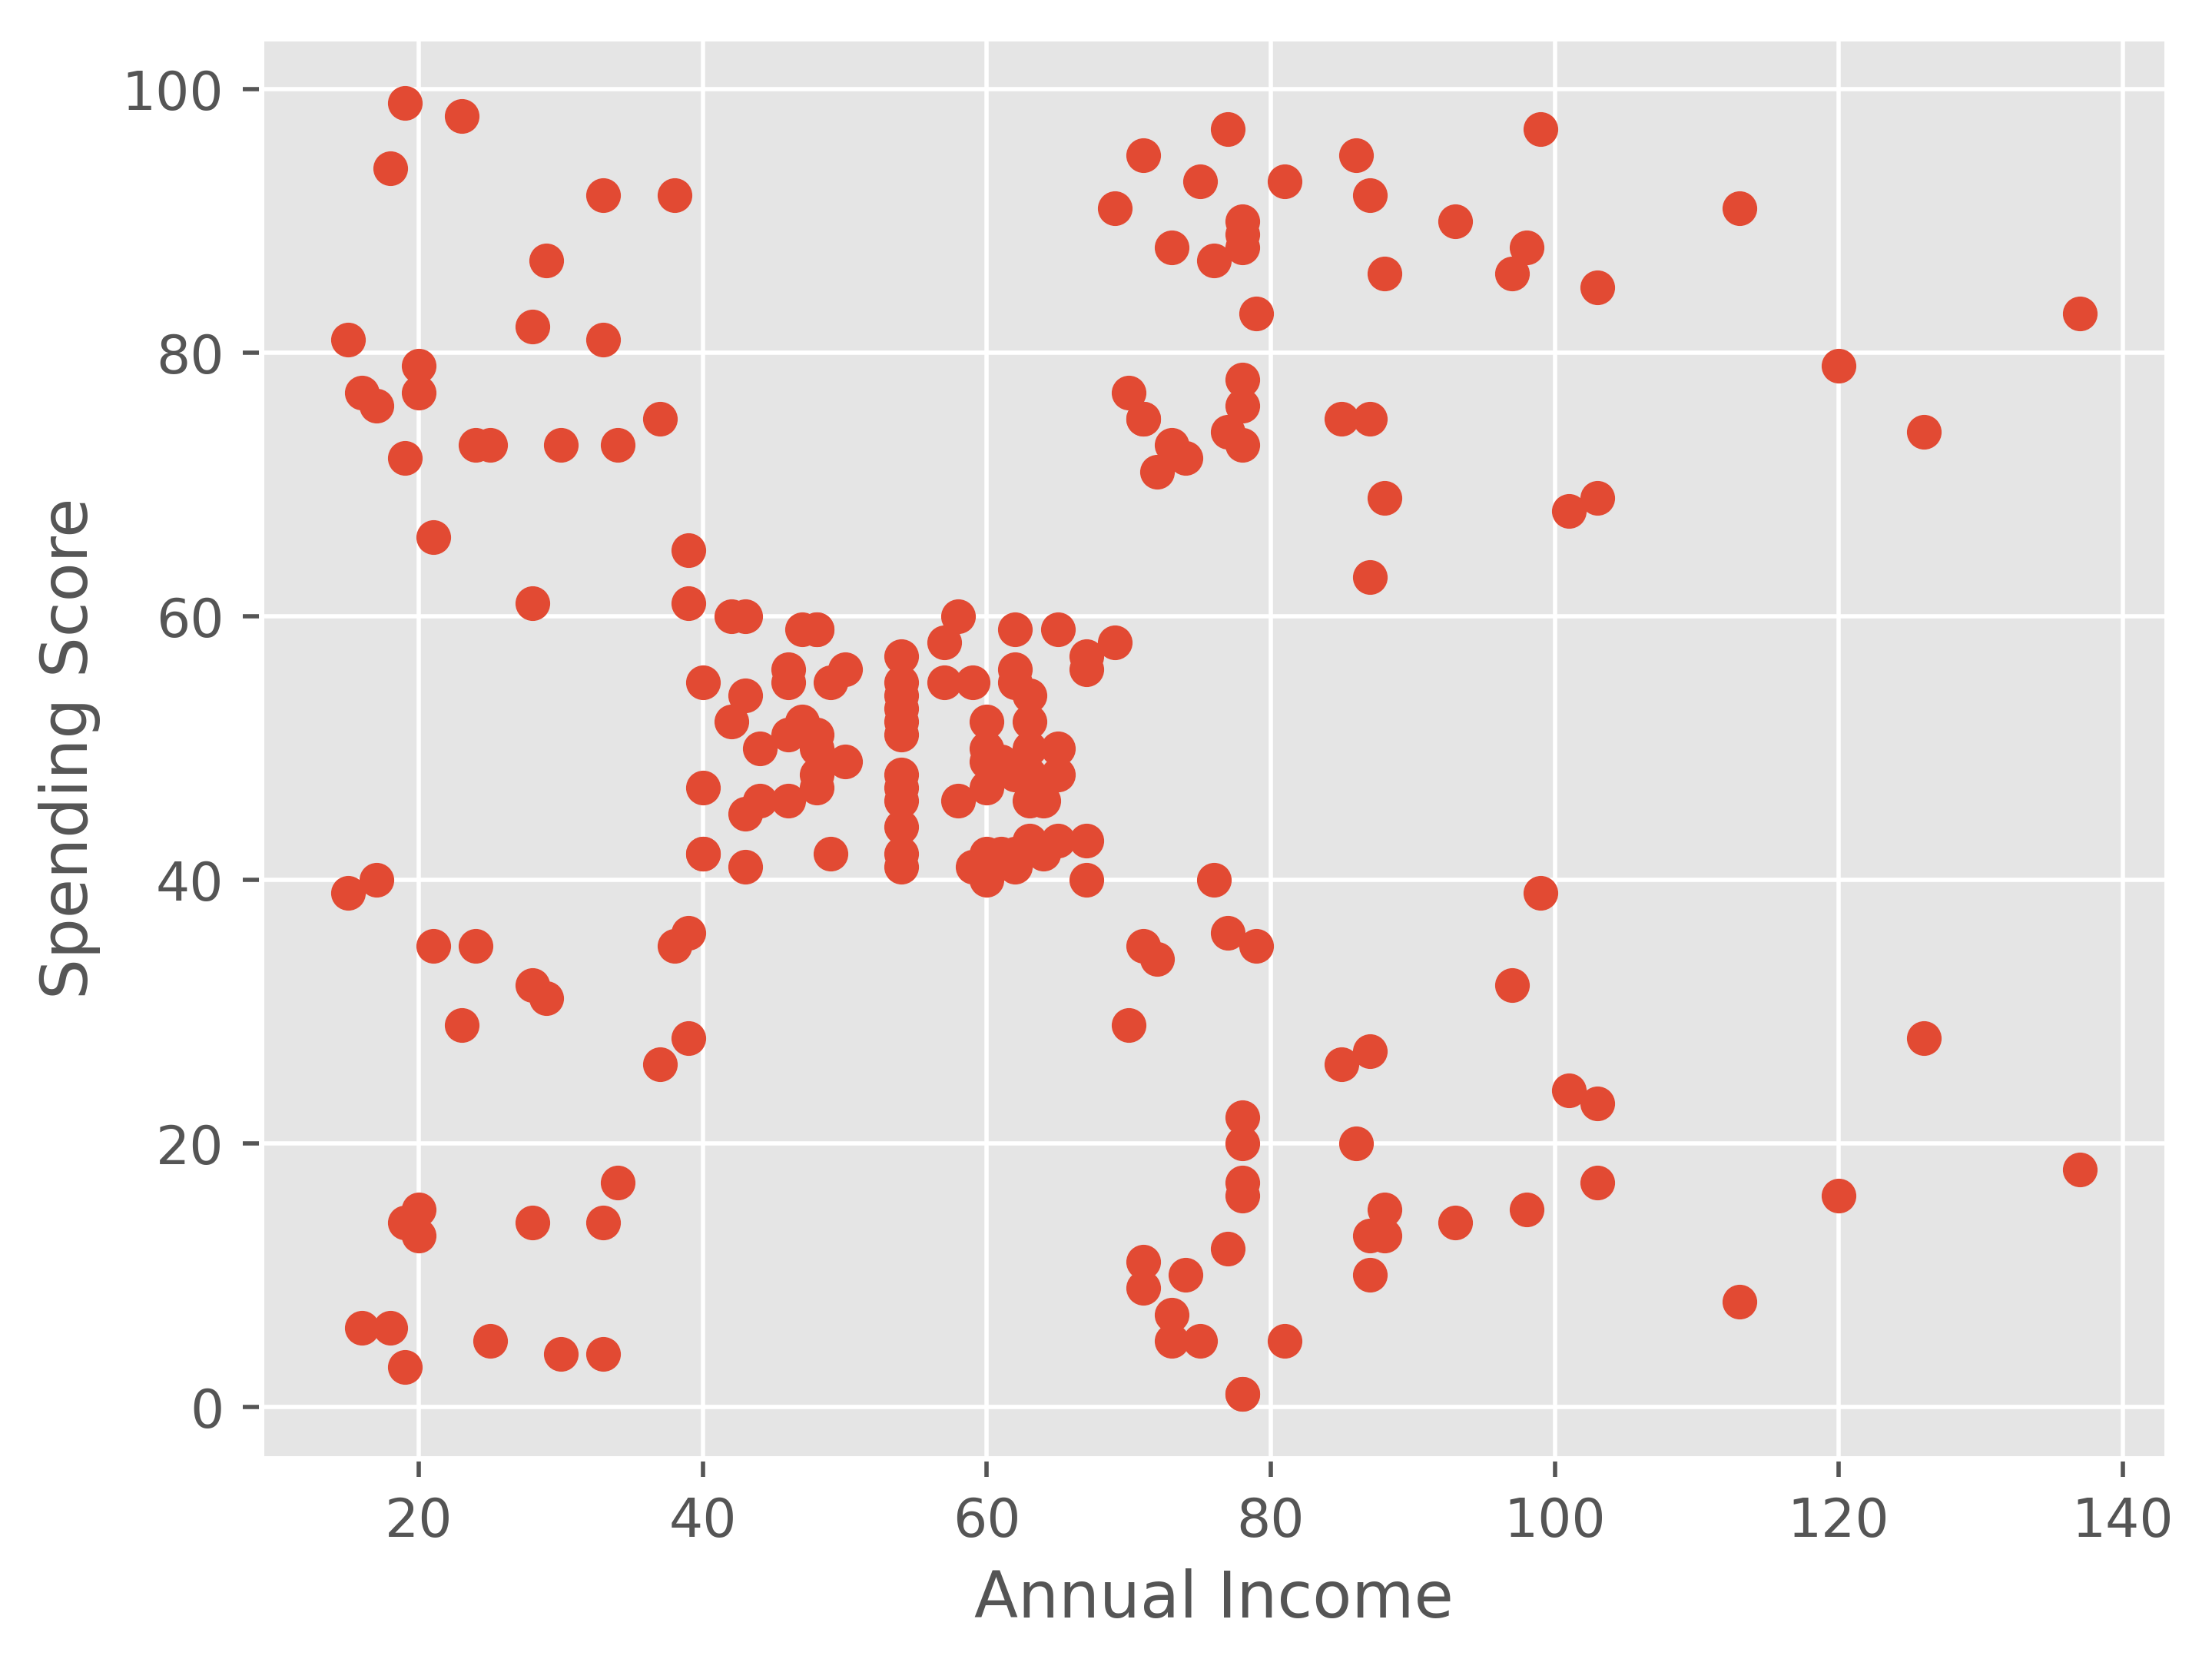

In [13]:
# Annual Income vs Spending Score

plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

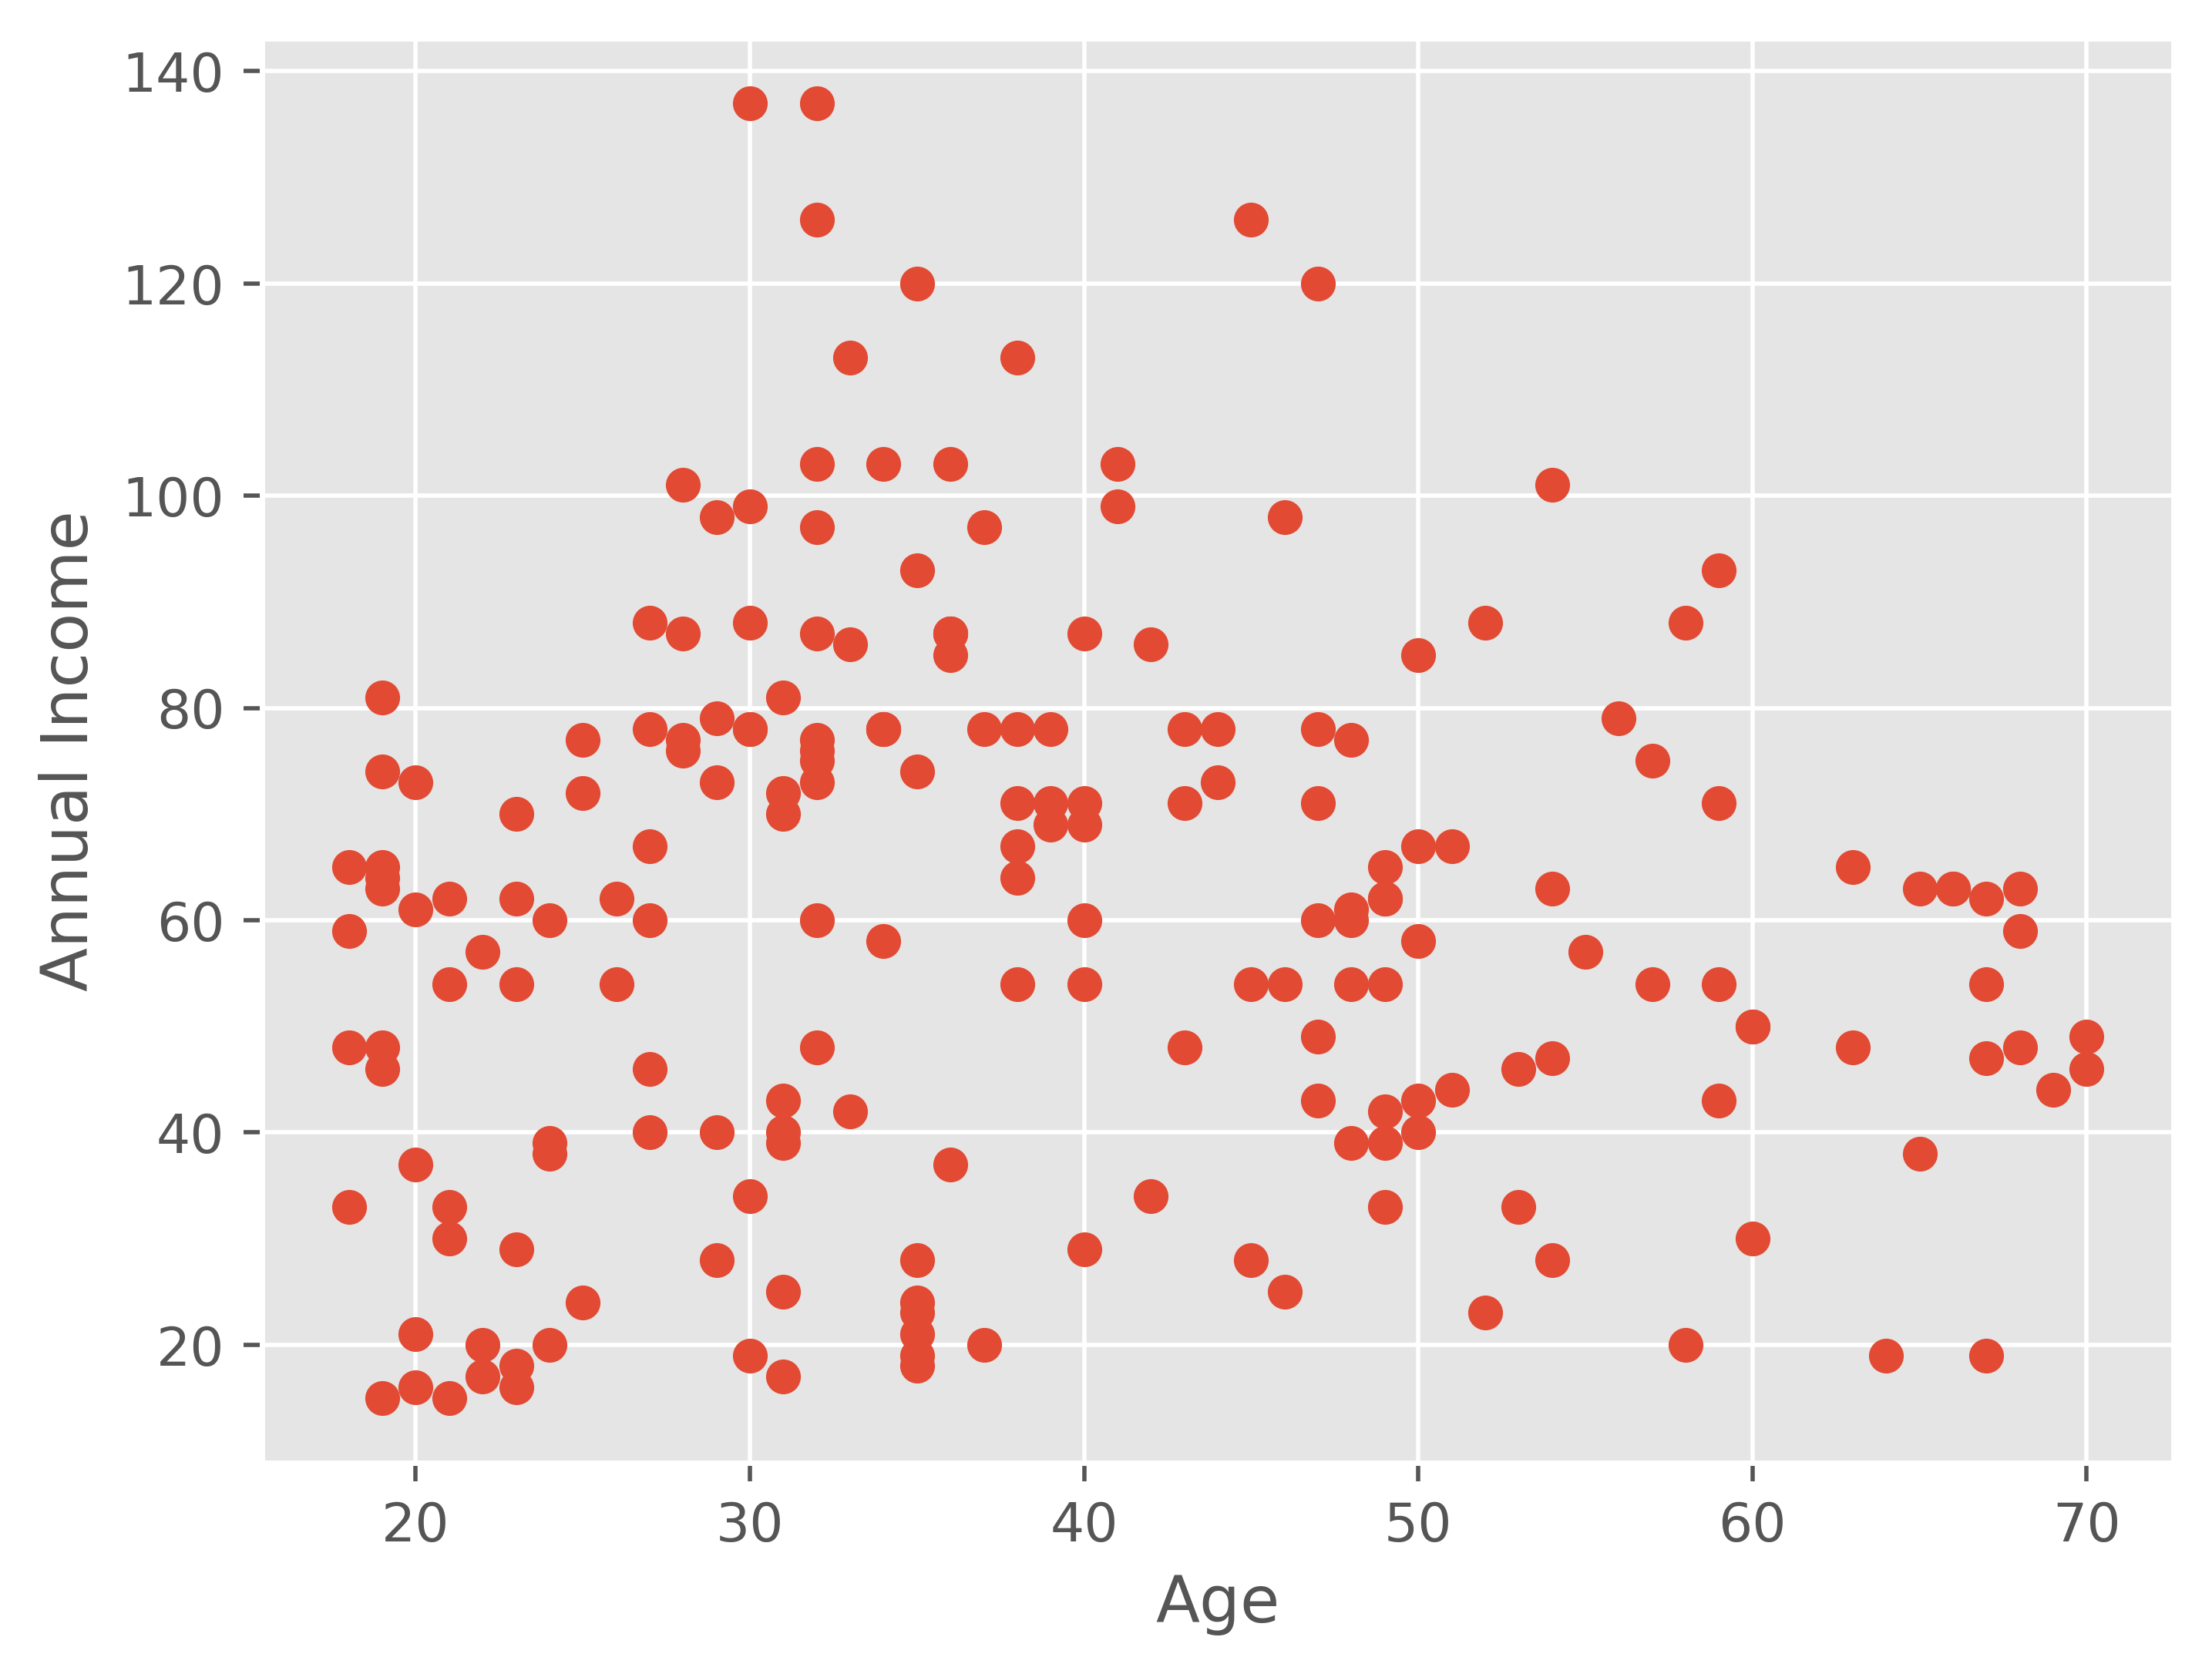

In [14]:
# Age vs Spending Score

plt.scatter(df["Age"],df["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

## Customer Segmentation using KMeans

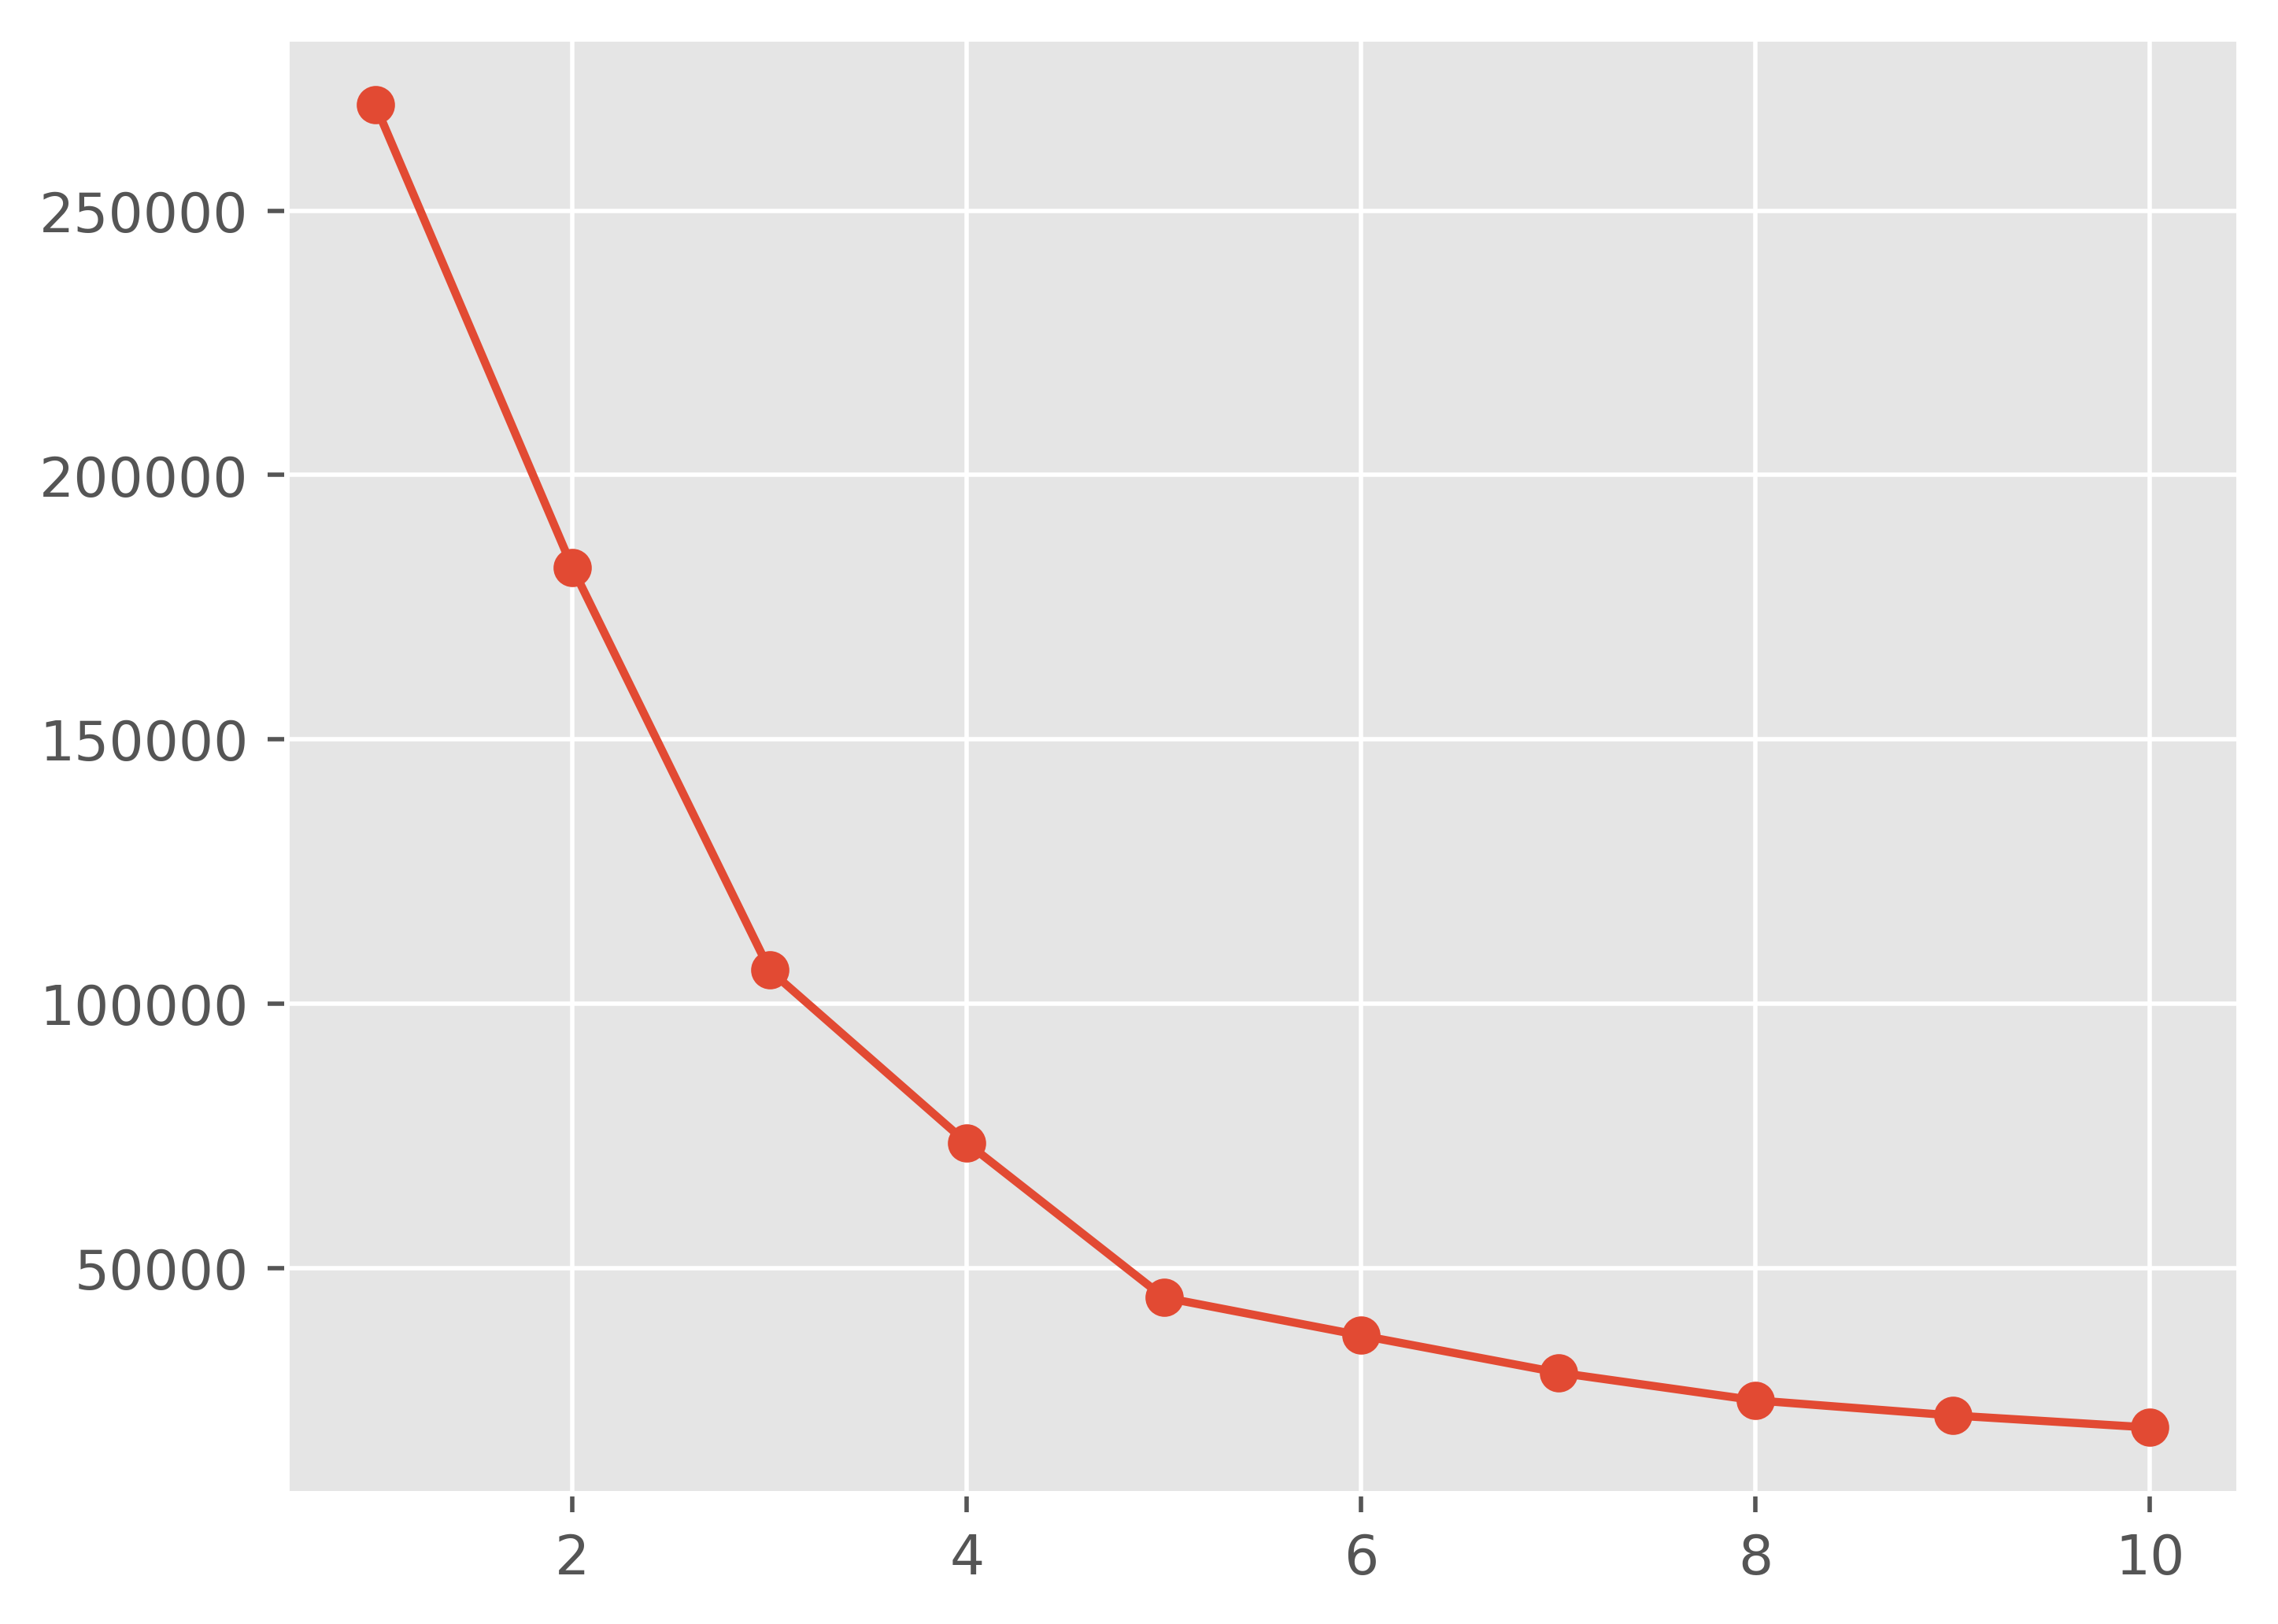

In [15]:
# Finding value of K for KMeans

wcss = []

X = df[["Annual Income (k$)","Spending Score (1-100)"]].values

for k in range(1,11):
    kmean = KMeans(n_clusters=k,init='k-means++',n_init=10)
    kmean.fit(X)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,11),wcss,marker='o')
plt.show()

In [16]:
# Clustering customers

kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10,random_state=42)
Y = kmeans.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [17]:
# Centeroid co-ordinates 

print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


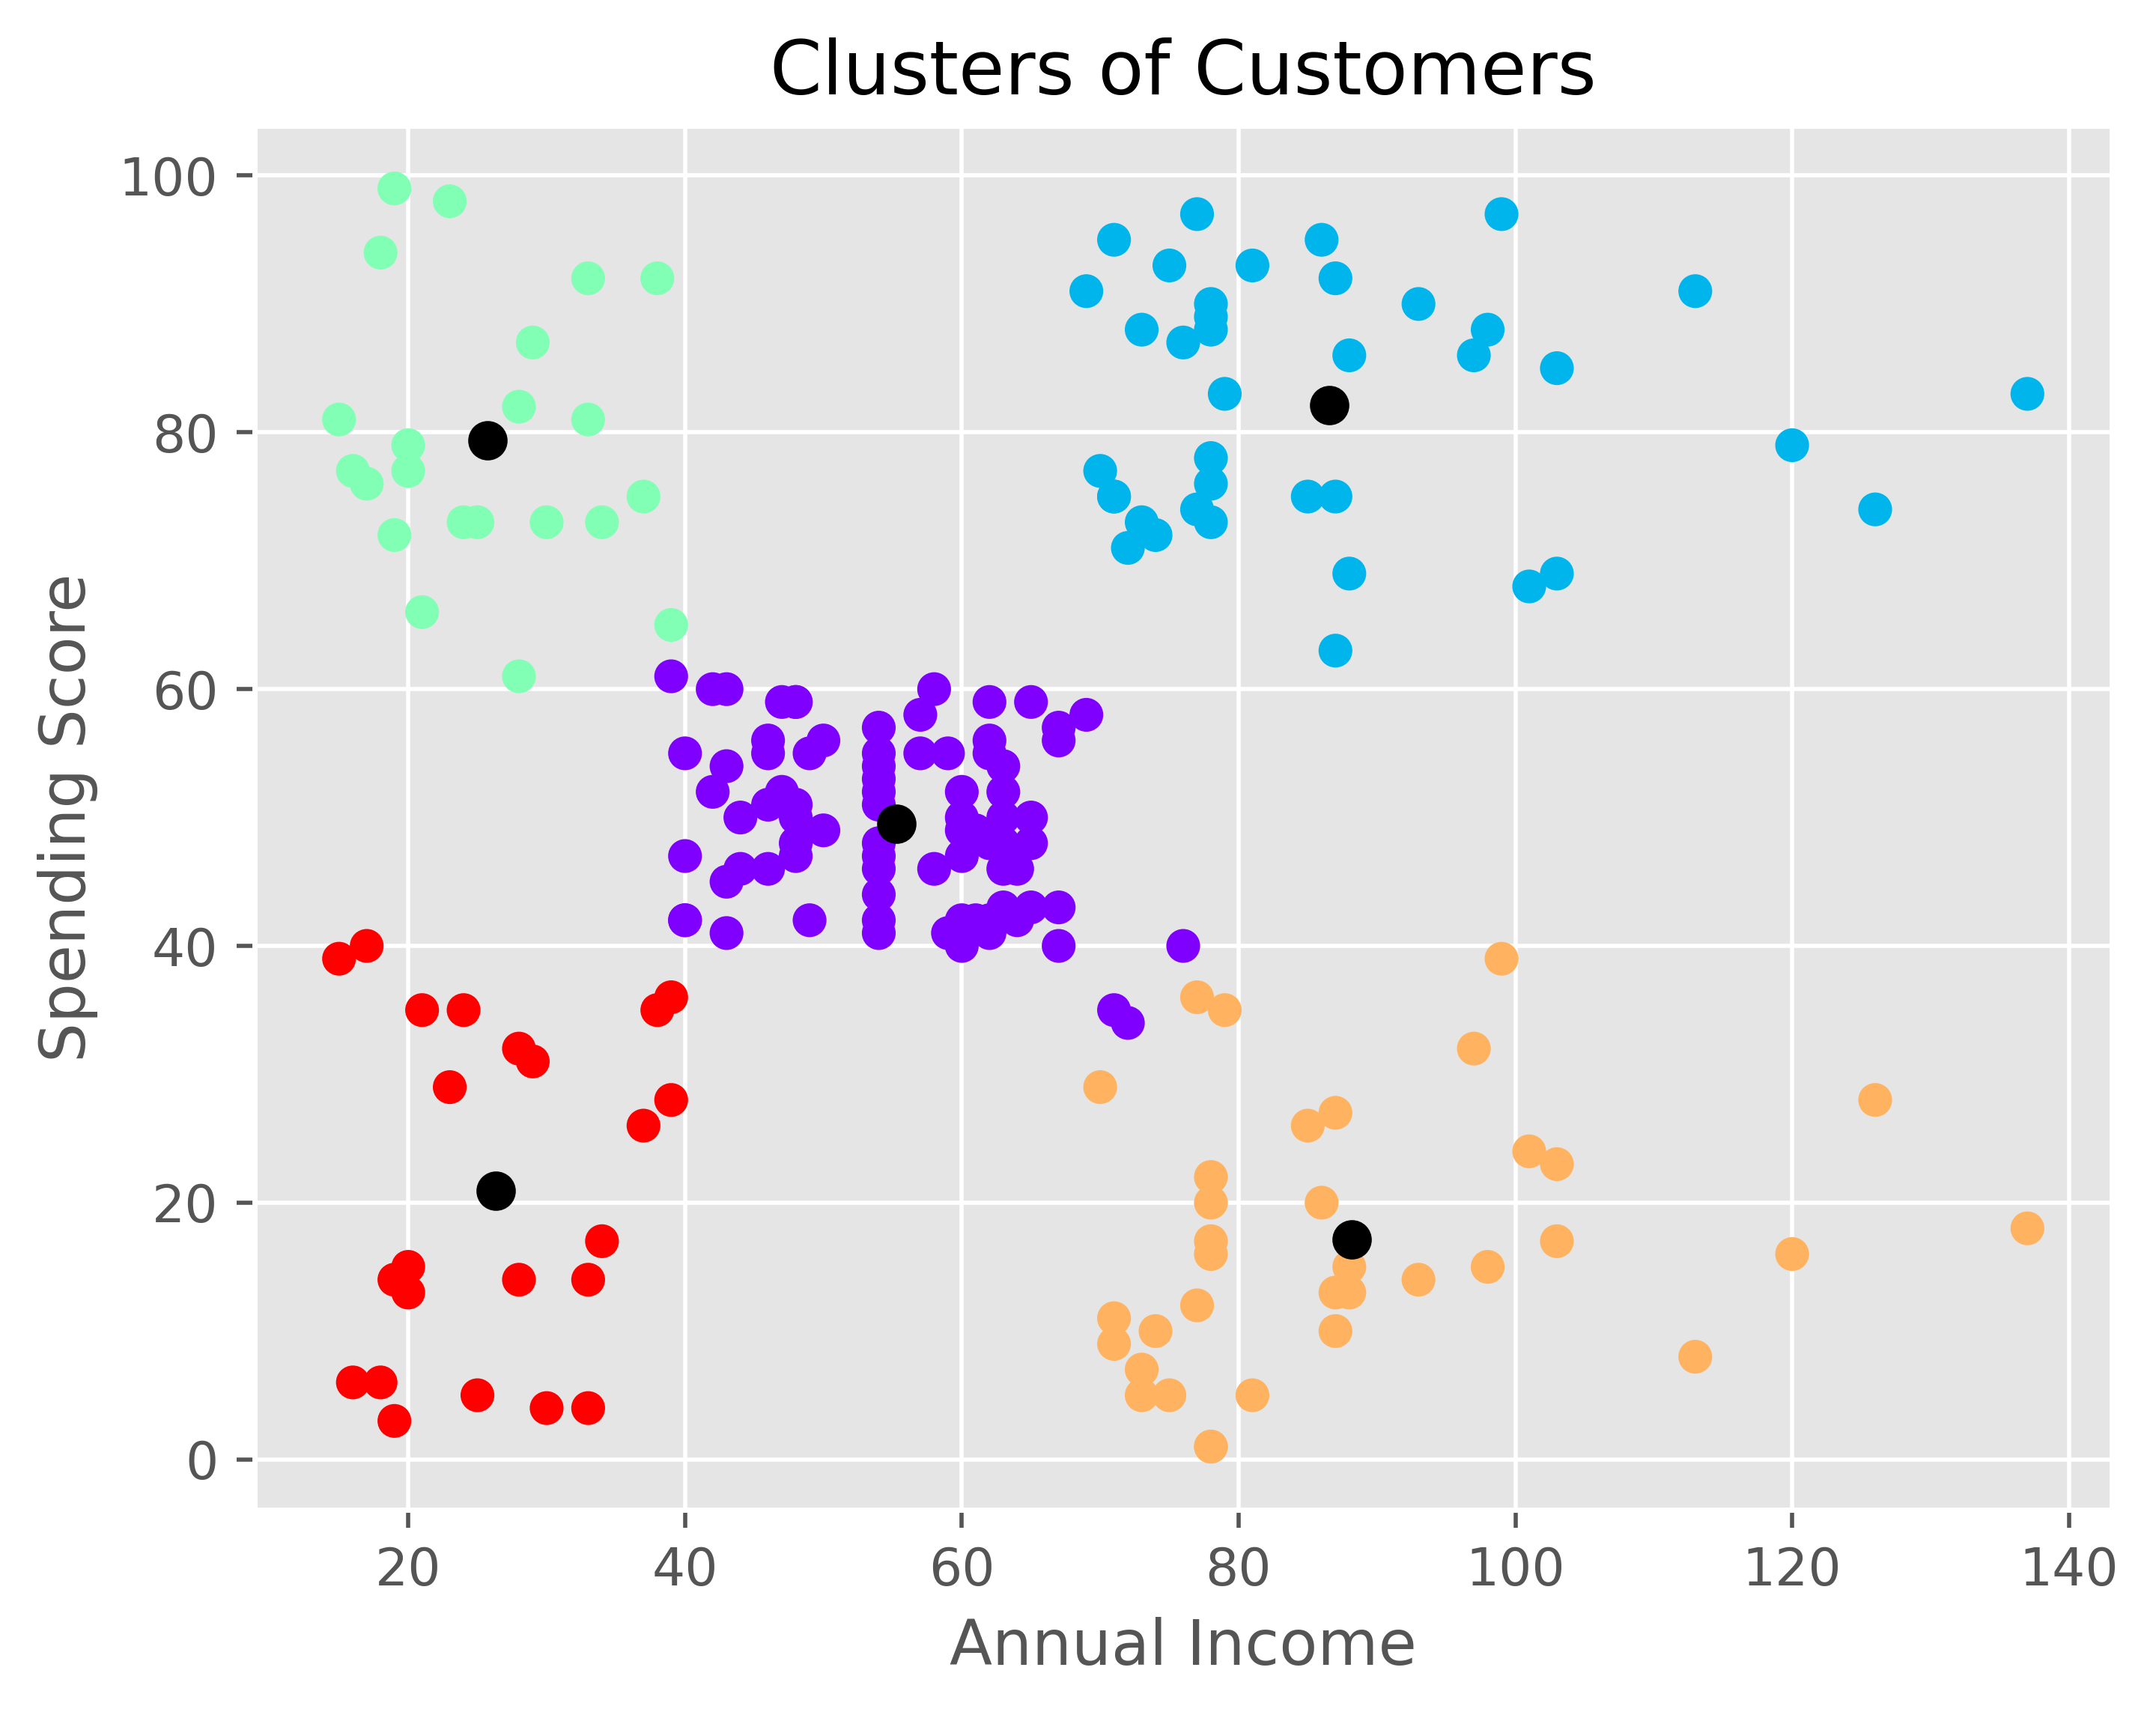

In [18]:
# Plotting Clusters

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=50)
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()